In [86]:
import json

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
def build_df_for_confidence_interval(to_viz):
    to_df = {'iteration': [], 'losses': []}

    max_len = 0
    for i in range(len(to_viz)):
        max_len = max(max_len, len(to_viz[i]))

    for j in range(max_len):
        for i in range(len(to_viz)):
            if j < len(to_viz[i]):
                loss = min(to_viz[i][j])
                to_df['iteration'].append(j)
                to_df['losses'].append(loss)

    return pd.DataFrame.from_dict(to_df).sort_values(by=['iteration']), max_len

def draw_confidence_intervals(target_olr: str, amount: int):
    losses_2 = []
    losses_5 = []

    for i in range(amount):
        with open(f'./history/criteria-2-olr-{target_olr}-{i}.json', 'r') as f:
            losses_2.append(json.load(f))
        with open(f'./history/criteria-5-olr-{target_olr}-{i}.json', 'r') as f:
            losses_5.append(json.load(f))
    
    df_2, max_len_2 = build_df_for_confidence_interval(losses_2)
    df_5, max_len_5 = build_df_for_confidence_interval(losses_5)
    
    fig, ax = plt.subplots()
    
    sns.lineplot(data=df_2, x="iteration", y="losses", label='Early stopping iters: 2', ax=ax)
    ax.hlines(df_2.iloc[-1]['losses'], -1, max_len_2 - 1, color='black', linestyles='dotted', alpha=0.3)
    
    sns.lineplot(data=df_5, x="iteration", y="losses", label='Early stopping iters: 5', ax=ax)
    ax.hlines(df_5.iloc[-1]['losses'], -1, max_len_5 - 1, color='black', linestyles='dotted', alpha=0.3)
    
    plt.title(f'Target OLR: {target_olr}, comps: 2, dims: 4, prob of edge: 0.4')
    plt.legend()
    plt.xlim([-0.5, max(max_len_2, max_len_5)])
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.show()

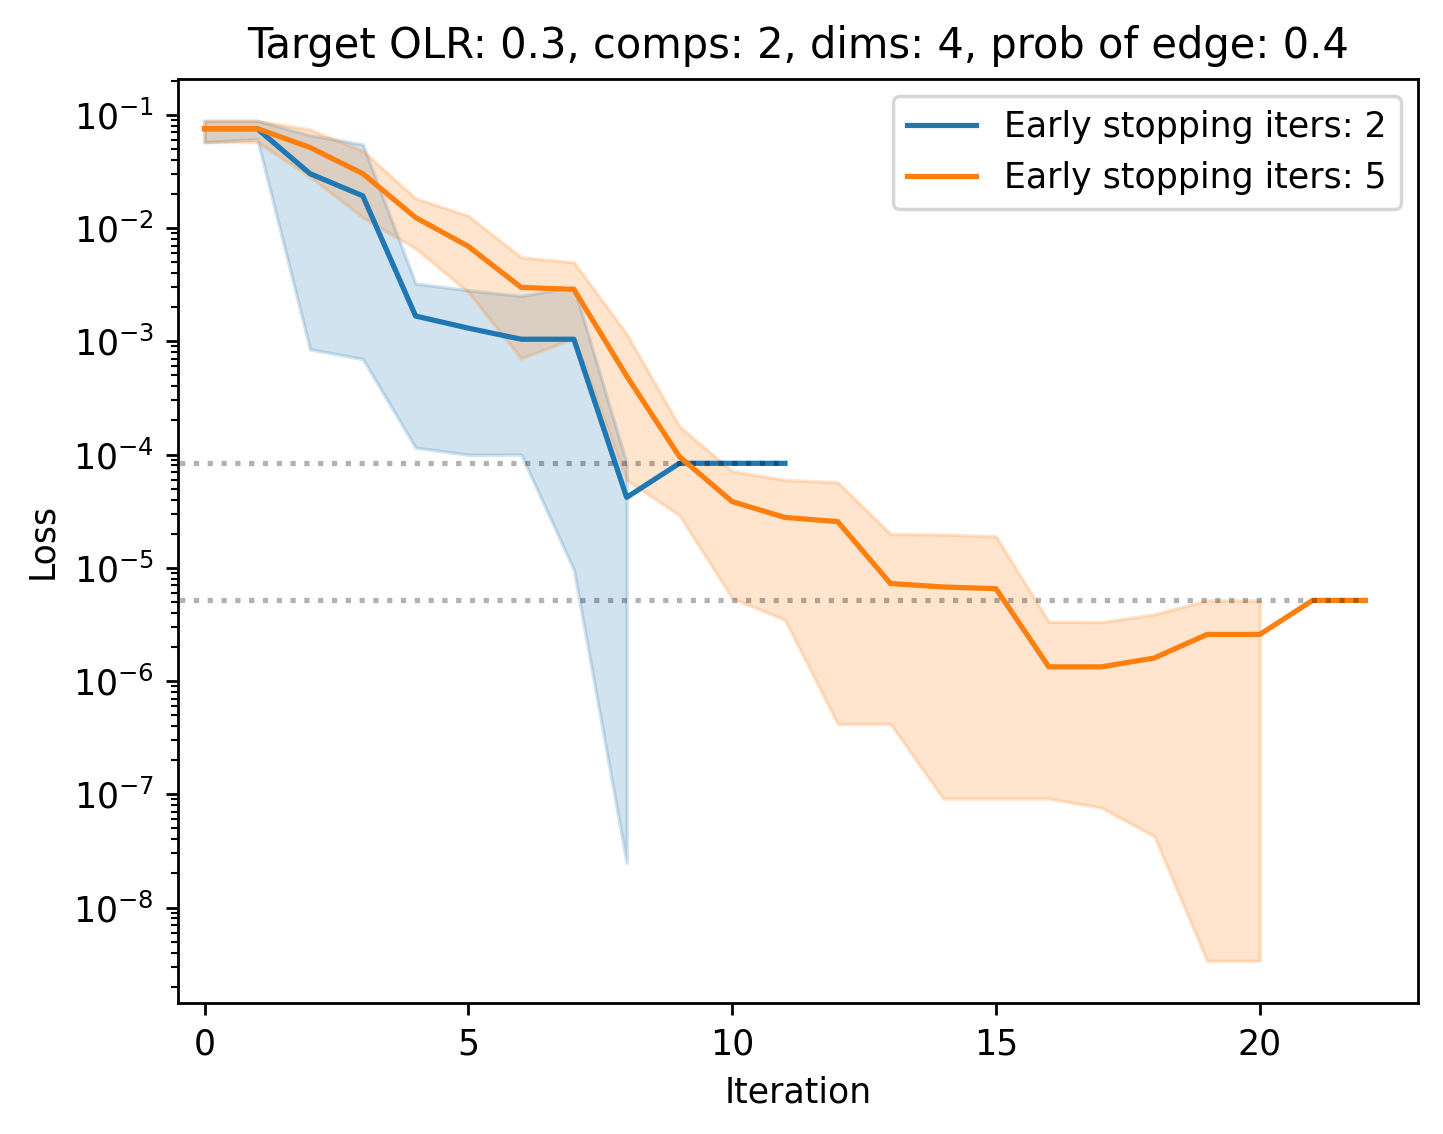

In [135]:
plt.rcParams['figure.dpi'] = 250

draw_confidence_intervals(0.3, 5)

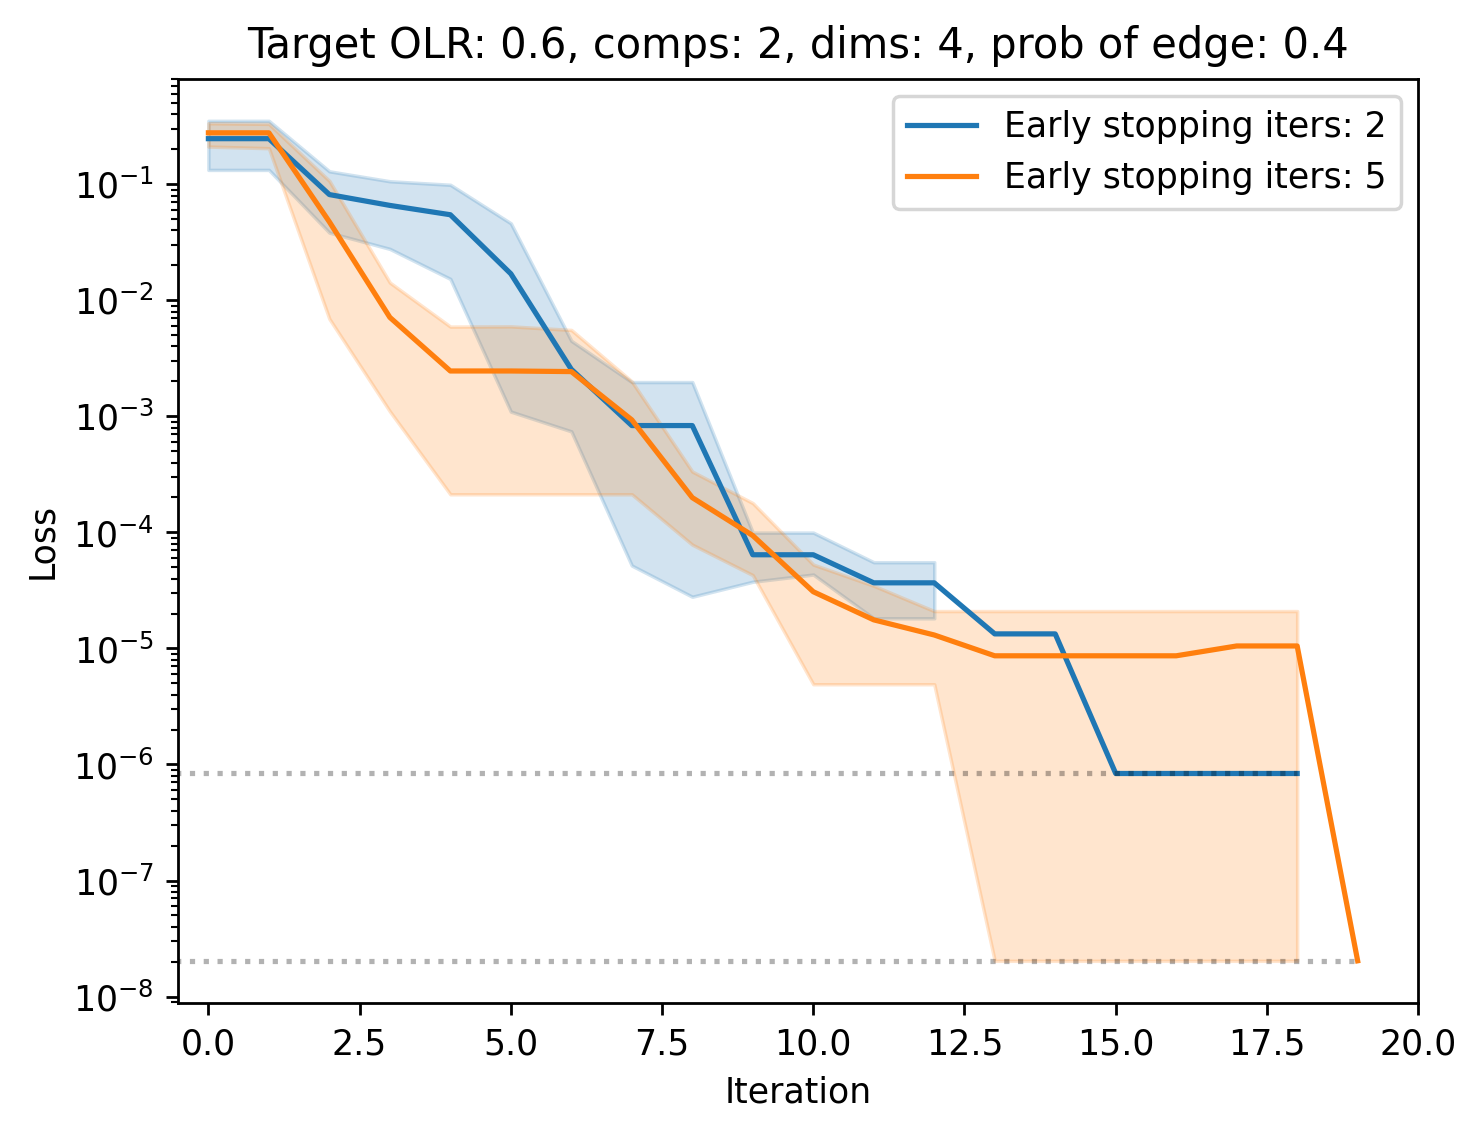

In [136]:
draw_confidence_intervals(0.6, 5)